In [1]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import fitsio as ft

In [3]:
import numpy as np

In [2]:
bmzls = ft.read('/home/mehdi/data/rongpu/imaging_sys/tables/nelg_features_bmzls_256.fits')
ndecals = ft.read('/home/mehdi/data/rongpu/imaging_sys/tables/nelg_features_ndecals_256.fits')
sdecals = ft.read('/home/mehdi/data/rongpu/imaging_sys/tables/nelg_features_sdecals_256.fits')

In [4]:
combined = np.concatenate([bmzls, ndecals, sdecals])

In [5]:
combined.size

320847

In [6]:
bmzls.size + ndecals.size + sdecals.size

320847

In [8]:
combined.dtype

dtype([('features', '>f8', (13,)), ('label', '>f8'), ('fracgood', '>f8'), ('hpix', '>i8')])

In [12]:
import matplotlib.pyplot as plt

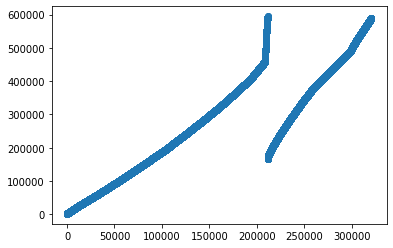

In [13]:
plt.scatter(np.arange(320847), combined['hpix'])

In [20]:
common = np.intersect1d(bmzls['hpix'], ndecals['hpix'])

In [23]:
isnot_common = ~np.in1d(combined['hpix'], common)

In [24]:
combined_good = combined[isnot_common]

In [25]:
combined_good.size, combined.size

(319871, 320847)

In [26]:
from lssutils.utils import hpix2radec

In [27]:
radec = hpix2radec(256, combined_good['hpix'])

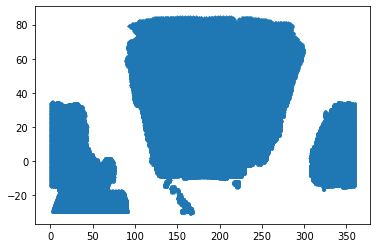

In [29]:
plt.scatter(*radec, 1.)

In [30]:
np.unique(combined_good['hpix']).size, combined_good['hpix'].size

(319871, 319871)

In [31]:
ft.write('/home/mehdi/data/rongpu/imaging_sys/tables/nelg_features_combined_256.fits', combined_good)